<a href="https://colab.research.google.com/github/sba22203/master_thesis/blob/main/thesis_21_08_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

time series - prophet


Now let's import all the libraries for our study
Pandas: Data manipulation and analysis with DataFrames.
NumPy:Numerical computing with arrays and math functions.
Prophet: Time series forecasting tool by Facebook.
Plotly:Interactive, publication-quality graphs and charts.
Matplotlib: Versatile Python plotting library.
PyStan:Python interface for Bayesian modeling with Stan.
scikit-learn: Machine learning library for Python.
NeuralProphet:Time series forecasting with deep learning.
TensorFlow:Open-source machine learning framework by Google.


In [ ]:
pip install pandas numpy prophet plotly matplotlib pystan pip scikit-learn neuralprophet tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.1/137.1 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 80.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of neuralprophet to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.1/137.1 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 96.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.

Now, let's import the libraries

In [ ]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objs as go


# preprocessing

# Data loading

Now, let' s import several indexes from Euronext and Finance yahoo (2 years 11/08/2021 to 11/08/2023) BEL20 (belgium), FTSE100 (UK), CAC40, ISEQ20 (ireland), DAX40 Germany), PSI20 (portugal), in order to preprocess them and compra the irish market to most important and relevant european indexes. And let's use date and close columns.


In [ ]:
# List of dataset filenames
datasets = [
    "BEL20.xlsx",
    "FTSE100.xlsx",
    "CAC40.xlsx",
    "ISEQ20.xlsx",
    "DAX40.xlsx",
    "PSI20.xlsx"
]

# Load datasets and calculate missing values and outliers
for dataset in datasets:
    df = pd.read_excel(dataset)
    close_column = df['Close']



In [ ]:
# print basic statistics
for dataset in datasets:
    df = pd.read_excel(dataset)
    close_column = df['Close']

    # Print basic statistics for the 'Close' column
    print(f"Basic Statistics for '{dataset}' - 'Close' Column:")
    print(close_column.describe())
    print("\n")


Basic Statistics for 'BEL20.xlsx' - 'Close' Column:
count     517.000000
mean     3885.008603
std       259.889928
min      3313.820068
25%      3685.550049
50%      3846.550049
75%      4125.850098
max      4402.319824
Name: Close, dtype: float64


Basic Statistics for 'FTSE100.xlsx' - 'Close' Column:
count     523.000000
mean     7286.048107
std      1050.270680
min         0.000000
25%      7218.675000
50%      7452.840000
75%      7588.340000
max      8014.310000
Name: Close, dtype: float64


Basic Statistics for 'CAC40.xlsx' - 'Close' Column:
count     517.000000
mean     6758.133625
std       460.058401
min      5676.870117
25%      6449.379883
50%      6731.370117
75%      7152.600098
max      7577.000000
Name: Close, dtype: float64


Basic Statistics for 'ISEQ20.xlsx' - 'Close' Column:
count     510.000000
mean     1346.220976
std       136.906465
min      1063.239990
25%      1227.999970
50%      1381.984985
75%      1469.257507
max      1545.069946
Name: Close, dtype: float64

Missing values

In [ ]:
import pandas as pd

# Function to calculate and print missing values
def calculate_missing_values(dataset_name, column_name):
    missing_values = close_column.isnull().sum()
    print(f"Missing Values in '{dataset_name}' - '{column_name}' Column: {missing_values}")

# Calculate and print missing values for each dataset
for dataset in datasets:
    calculate_missing_values(dataset, 'Close')

Missing Values in 'BEL20.xlsx' - 'Close' Column: 0
Missing Values in 'FTSE100.xlsx' - 'Close' Column: 0
Missing Values in 'CAC40.xlsx' - 'Close' Column: 0
Missing Values in 'ISEQ20.xlsx' - 'Close' Column: 0
Missing Values in 'DAX40.xlsx' - 'Close' Column: 0
Missing Values in 'PSI20.xlsx' - 'Close' Column: 0


Outliers

In [ ]:
# Function to identify and print outliers using Z-score
def identify_and_print_outliers(dataset_name, z_threshold=3.0):
    df = pd.read_excel(dataset)
    close_column = df['Close']
    # Extract 'Date' and 'Close' columns
    date_column = df['Date']

    # Calculate Z-scores for the 'Close' column
    z_scores = np.abs((close_column - close_column.mean()) / close_column.std())

    # Identify and print outliers
    outliers = df[z_scores > z_threshold]
    print(f"Potential Outliers in Close column '{dataset_name}")
    print(outliers[['Date', 'Close']])

# Set the Z-score threshold for identifying outliers
z_threshold = 3.0

# Identify and print outliers for each dataset in the 'Close' column
for dataset in datasets:
    identify_and_print_outliers(dataset, z_threshold)

Potential Outliers in Close column 'BEL20.xlsx
Empty DataFrame
Columns: [Date, Close]
Index: []
Potential Outliers in Close column 'FTSE100.xlsx
          Date  Close
159 2023-01-02    0.0
160 2022-12-30    0.0
163 2022-12-27    0.0
164 2022-12-26    0.0
165 2022-12-23    0.0
419 2022-01-03    0.0
420 2021-12-31    0.0
423 2021-12-28    0.0
424 2021-12-27    0.0
425 2021-12-24    0.0
Potential Outliers in Close column 'CAC40.xlsx
Empty DataFrame
Columns: [Date, Close]
Index: []
Potential Outliers in Close column 'ISEQ20.xlsx
Empty DataFrame
Columns: [Date, Close]
Index: []
Potential Outliers in Close column 'DAX40.xlsx
Empty DataFrame
Columns: [Date, Close]
Index: []
Potential Outliers in Close column 'PSI20.xlsx
Empty DataFrame
Columns: [Date, Close]
Index: []


In [ ]:
# Function to identify and print outliers using Z-score
def identify_and_print_outliers(dataset_name, z_threshold=3.0):

    # Calculate Z-scores for the 'Close' column
    z_scores = np.abs((close_column - close_column.mean()) / close_column.std())

    # Remove outliers from the DataFrame
    df_cleaned = df[z_scores <= z_threshold]
    return df_cleaned


# Iterate through datasets, identify outliers, remove outliers, and save cleaned data
for dataset in datasets:
    print(f"Processing dataset: {dataset}")
    cleaned_data = identify_and_print_outliers(dataset, z_threshold)
    cleaned_dataset_name = f"Cleaned_{dataset}"
    cleaned_data.to_excel(cleaned_dataset_name, index=False)
    print(f"Outliers removed from '{dataset}' and cleaned data saved to '{cleaned_dataset_name}'")


Processing dataset: BEL20.xlsx
Outliers removed from 'BEL20.xlsx' and cleaned data saved to 'Cleaned_BEL20.xlsx'
Processing dataset: FTSE100.xlsx
Outliers removed from 'FTSE100.xlsx' and cleaned data saved to 'Cleaned_FTSE100.xlsx'
Processing dataset: CAC40.xlsx
Outliers removed from 'CAC40.xlsx' and cleaned data saved to 'Cleaned_CAC40.xlsx'
Processing dataset: ISEQ20.xlsx
Outliers removed from 'ISEQ20.xlsx' and cleaned data saved to 'Cleaned_ISEQ20.xlsx'
Processing dataset: DAX40.xlsx
Outliers removed from 'DAX40.xlsx' and cleaned data saved to 'Cleaned_DAX40.xlsx'
Processing dataset: PSI20.xlsx
Outliers removed from 'PSI20.xlsx' and cleaned data saved to 'Cleaned_PSI20.xlsx'


In [ ]:
# Function to identify and remove outliers using Z-score
def remove_outliers(dataset_name, z_threshold=3.0):
    df = pd.read_excel(dataset_name)
    close_column = df['Close']

    # Calculate Z-scores for the 'Close' column
    z_scores = np.abs((close_column - close_column.mean()) / close_column.std())

    # Identify and remove outliers
    df_cleaned = df[z_scores <= z_threshold]
    return df_cleaned

# Set the Z-score threshold for identifying outliers
z_threshold = 3.0

# Remove outliers and change names for 'FTSE100_2years.xlsx'
ftse_dataset = "FTSE100.xlsx"
cleaned_ftse_data = remove_outliers(ftse_dataset, z_threshold)
cleaned_ftse_dataset_name = "Cleaned_" + ftse_dataset
cleaned_ftse_data.to_excel(cleaned_ftse_dataset_name, index=False)
print(f"Outliers removed from '{ftse_dataset}' and cleaned data saved to '{cleaned_ftse_dataset_name}'")

# Change names for other datasets
for dataset in datasets:
    if dataset != ftse_dataset:
        new_dataset_name = "Cleaned_" + dataset
        pd.read_excel(dataset).to_excel(new_dataset_name, index=False)
        print(f"Cleaned data saved to '{new_dataset_name}'")



Outliers removed from 'FTSE100.xlsx' and cleaned data saved to 'Cleaned_FTSE100.xlsx'
Cleaned data saved to 'Cleaned_BEL20.xlsx'
Cleaned data saved to 'Cleaned_CAC40.xlsx'
Cleaned data saved to 'Cleaned_ISEQ20.xlsx'
Cleaned data saved to 'Cleaned_DAX40.xlsx'
Cleaned data saved to 'Cleaned_PSI20.xlsx'


#**comparision ISEQ20 to other indices**

After cleaning the data, let's compare the european indexes

In [ ]:
# List of dataset filenames
datasets = [
    "Cleaned_BEL20.xlsx",
    "Cleaned_FTSE100.xlsx",
    "Cleaned_CAC40.xlsx",
    "Cleaned_ISEQ20.xlsx",
    "Cleaned_DAX40.xlsx",
    "Cleaned_PSI20.xlsx"
]
dataframes = [pd.read_excel(dataset) for dataset in datasets]

In [ ]:
# comining datasets
combined_df = pd.concat([df.set_index('Date')['Close'] for df in dataframes], axis=1)
combined_df.columns = datasets


In [ ]:
fig = px.line(combined_df, x=combined_df.index, y=combined_df.columns, title='Close Prices of european Indices')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Close Price')
fig.show()


let's create a heatmap and see what are the correlations between indexes

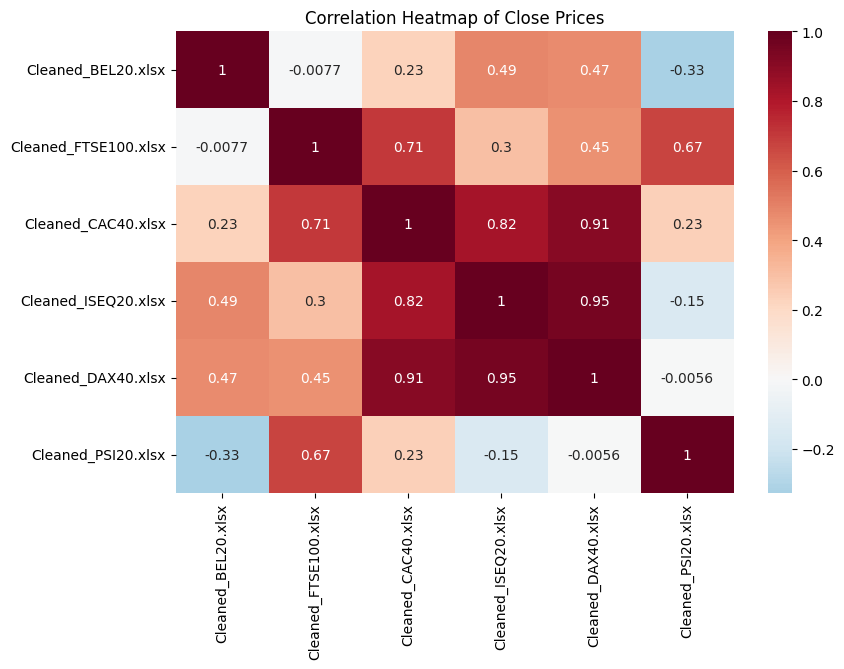

In [ ]:
# Calculate correlation matrix
correlation_matrix = combined_df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0)
plt.title('Correlation Heatmap of Close Prices')
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Load the datasets for CAC 40 and ISEQ 20
dax_data = pd.read_excel("Cleaned_DAX40.xlsx")
iseq20_data = pd.read_excel("Cleaned_ISEQ20.xlsx")

# Merge the two datasets based on the Date column
merged_data = pd.merge(dax_data, iseq20_data, on="Date", how="inner", suffixes=("_DAX40", "_ISEQ20"))

# Define a threshold for meeting points
threshold = 10  # You can adjust this value
merged_data["Price_Difference"] = abs(merged_data["Close_DAX40"] - merged_data["Close_ISEQ20"])
meeting_points = merged_data[merged_data["Price_Difference"] < threshold]

# Create the scatter plot
fig = px.scatter(
    merged_data,
    x="Close_DAX40",
    y="Close_ISEQ20",
    title="Scatter Plot: DAX 40 vs ISEQ 20",
    color="Price_Difference",
    color_continuous_scale="Viridis",  # Use a built-in color scale
    labels={"Close_DAX40": "DAX40 Close Price", "Close_ISEQ20": "ISEQ 20 Close Price"},
    hover_name="Date"
)

# Add meeting points as annotations
for index, row in meeting_points.iterrows():
    fig.add_annotation(
        x=row["Close_DAX"],
        y=row["Close_ISEQ20"],
        text="Meeting Point",
        showarrow=True,
        arrowhead=2,
        arrowcolor="red",
    )

# Customize plot appearance
fig.update_layout(
    coloraxis_colorbar=dict(title="Price Difference"),
    coloraxis_colorbar_len=0.6,
    coloraxis_colorbar_x=0.95,
)

# Show the plot
fig.show()

let's compare bot indexes, and we can see they are both correlated and same evolution over time (when CAC goes down, iseq follows the same evolution, and when CAC is up, iseq goes up). CAC is a bigger index, of course compare to iseq

In [ ]:

# Load the datasets for CAC 40 and ISEQ 20
dax_df = pd.read_excel("Cleaned_DAX40.xlsx")
iseq20_df = pd.read_excel("Cleaned_ISEQ20.xlsx")

# Create a DataFrame for each index with Date and Close columns
dax_data = pd.DataFrame({"Date": dax_df["Date"], "CAC 40": dax_df["Close"]})
iseq20_data = pd.DataFrame({"Date": iseq20_df["Date"], "ISEQ 20": iseq20_df["Close"]})

# Merge the dataframes based on the Date column
merged_df = pd.merge(dax_data, iseq20_data, on="Date", how="inner")

# Create a stacked area chart using Plotly Express
fig = px.area(merged_df, x="Date", y=["CAC 40", "ISEQ 20"],
              title="Comparison of CAC 40 and ISEQ 20 Evolution",
              labels={"Date": "Date", "value": "Close Price"},
              template="plotly_dark",
              color_discrete_sequence=['#1f77b4', '#ff7f0e'])

# Adjust the trace opacity
fig.update_traces(opacity=0.7)

fig.update_layout(legend_title_text="Index")
fig.update_xaxes(type="date")

# Show the plot
fig.show()


In [ ]:
# Load the datasets for CAC 40 and ISEQ 20
dax_df = pd.read_excel("Cleaned_DAX40.xlsx")
iseq20_df = pd.read_excel("Cleaned_ISEQ20.xlsx")

# Create a DataFrame with Date and Close columns for each index
dax_data = pd.DataFrame({"Date": dax_df["Date"], "Close_DAX": dax_df["Close"]})
iseq20_data = pd.DataFrame({"Date": iseq20_df["Date"], "Close_ISEQ20": iseq20_df["Close"]})

# Merge the dataframes based on the Date column
merged_df = pd.merge(dax_data, iseq20_data, on="Date", how="inner")

# Calculate daily returns
merged_df["Daily_Return_DAX"] = merged_df["Close_DAX"].pct_change()
merged_df["Daily_Return_ISEQ20"] = merged_df["Close_ISEQ20"].pct_change()

# Create a new column for color based on positive/negative returns
merged_df["Color"] = np.where(merged_df["Daily_Return_DAX"] >= 0, "Positive", "Negative")

# Create a subplot with two histograms for daily returns
fig = px.histogram(merged_df, x=["Daily_Return_DAX", "Daily_Return_ISEQ20"],
                   nbins=30, opacity=0.7,
                   facet_col="Color", # Separate histograms by color
                   labels={"value": "Daily Return", "variable": "Index"},
                   title="Distribution of Daily Returns: DAX vs ISEQ 20")

# Customize layout
fig.update_layout(
    xaxis_title="Daily Return",
    yaxis_title="Frequency",
    bargap=0.1
)

# Show the plot
fig.show()


In [ ]:
# Load the datasets for CAC 40 and ISEQ 20
dax_df = pd.read_excel("Cleaned_DAX40.xlsx")
iseq20_df = pd.read_excel("Cleaned_ISEQ20.xlsx")

# Create a DataFrame with Date and Close columns for each index
dax_data = pd.DataFrame({"Date": dax_df["Date"], "Close_DAX": dax_df["Close"]})
iseq20_data = pd.DataFrame({"Date": iseq20_df["Date"], "Close_ISEQ20": iseq20_df["Close"]})

# Merge the dataframes based on the Date column
merged_df = pd.merge(dax_data, iseq20_data, on="Date", how="inner")

# Calculate daily returns
merged_df["Daily_Return_DAX"] = merged_df["Close_DAX"].pct_change()
merged_df["Daily_Return_ISEQ20"] = merged_df["Close_ISEQ20"].pct_change()

# Create a new column for color based on positive/negative returns
merged_df["Color"] = np.where(merged_df["Daily_Return_DAX"] >= 0, "Positive", "Negative")

# Create the scatter plot with regression line and colored points
fig = px.scatter(merged_df, x="Daily_Return_DAX", y="Daily_Return_ISEQ20",
                 color="Color", # Use the "Color" column for coloring
                 title="Scatter Plot of Daily Returns: DAX vs ISEQ 20",
                 trendline="ols")

# Show the plot
fig.show()

In [ ]:
# Load the datasets for CAC 40 and ISEQ 20
dax_df = pd.read_excel("Cleaned_DAX40.xlsx")
iseq20_df = pd.read_excel("Cleaned_ISEQ20.xlsx")

# Create a DataFrame with Date and Close columns for each index
dax_data = pd.DataFrame({"Date": dax_df["Date"], "Close_DAX": dax_df["Close"]})
iseq20_data = pd.DataFrame({"Date": iseq20_df["Date"], "Close_ISEQ20": iseq20_df["Close"]})

# Merge the dataframes based on the Date column
merged_df = pd.merge(dax_data, iseq20_data, on="Date", how="inner")

# Calculate cumulative returns
merged_df["Cumulative_Return_DAX"] = (1 + merged_df["Close_DAX"].pct_change()).cumprod() - 1
merged_df["Cumulative_Return_ISEQ20"] = (1 + merged_df["Close_ISEQ20"].pct_change()).cumprod() - 1

# Create cumulative return plots
trace1 = go.Scatter(x=merged_df["Date"], y=merged_df["Cumulative_Return_DAX"],
                    mode="lines", name="DAX Cumulative Return")
trace2 = go.Scatter(x=merged_df["Date"], y=merged_df["Cumulative_Return_ISEQ20"],
                    mode="lines", name="ISEQ 20 Cumulative Return")

layout = go.Layout(title="Cumulative Returns: DAX vs ISEQ 20",
                   xaxis=dict(title="Date"),
                   yaxis=dict(title="Cumulative Return"))

fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()


# Exploratory Data Analysis

In [ ]:
# Load the Excel file and process the data
data = pd.read_excel("Cleaned_ISEQ20.xlsx")

fig = px.line(data, x='Date', y='Close', title='ISEQ 20 Closing Prices from 11/08/2021 to 11/08/2023', labels={'ds': 'Date', 'y': 'Closing Price'})
fig.update_layout(showlegend=True, xaxis=dict(showgrid=True), yaxis=dict(showgrid=True))
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Load the Excel file and process the data
df = pd.read_excel("Cleaned_ISEQ20.xlsx")
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

# Reshape the DataFrame using pd.melt()
melted_df = pd.melt(df, id_vars=["Month"], value_vars=["Close"], value_name="Close Price")

# Create the box plot
box_plot = px.box(melted_df, x="Month", y="Close Price",
                  labels={"Month": "Month", "Close Price": "Close Price"},
                  title="Box Plots: Monthly Close Prices of ISEQ 20")

# Show the plot
box_plot.show()



In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.api as sm

# Load the data
data = pd.read_excel("Cleaned_ISEQ20.xlsx")

# Create a pandas DataFrame
data = pd.DataFrame({'ISEQ20': data['Close']})

# Assuming your data has a datetime index
n_points = len(data)
data.index = pd.date_range(start='2021-08-11', periods=n_points, freq='D')

# Perform decomposition
iseq20_decomposition = sm.tsa.seasonal_decompose(data['ISEQ20'], model='additive')

# Create a new DataFrame with decomposed components
decomposed_data = pd.DataFrame({
    'ISEQ20_trend': iseq20_decomposition.trend,
    'ISEQ20_seasonal': iseq20_decomposition.seasonal,
    'ISEQ20_residual': iseq20_decomposition.resid,
}, index=data.index)

# Create plots for trend, seasonal, and residual components
fig_trend = px.line(decomposed_data, x=decomposed_data.index, y=['ISEQ20_trend'],
                     title="Trend Component for ISEQ20",
                     labels={'value': 'Trend', 'index': 'Date'})

fig_seasonal = px.line(decomposed_data, x=decomposed_data.index, y=['ISEQ20_seasonal'],
                       title="Seasonal Component for ISEQ20",
                       labels={'value': 'Seasonal Component', 'index': 'Date'})

fig_residual = px.line(decomposed_data, x=decomposed_data.index, y=['ISEQ20_residual'],
                       title="Residual Component for ISEQ20",
                       labels={'value': 'Residual', 'index': 'Date'})

# Show the plots
fig_trend.show()
fig_seasonal.show()
fig_residual.show()



In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots  # Import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the data
data = pd.read_excel("Cleaned_ISEQ20.xlsx")

# Assuming your data already has a datetime index
data.index = pd.to_datetime(data['Date'])  # Use the 'Date' column as the index

# Perform time series decomposition
iseq20_decomposition = seasonal_decompose(data['Close'], model='additive', period=30)  # Adjust period as needed

# Create subplots for observed, trend, seasonal, and residual components using Plotly
fig = make_subplots(rows=4, cols=1, shared_xaxes=True,
                    subplot_titles=("Observed", "Trend", "Seasonal", "Residual"))

# Add traces for each component
fig.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name='ISEQ20'),
              row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=iseq20_decomposition.trend, mode='lines', name='Trend'),
              row=2, col=1)
fig.add_trace(go.Scatter(x=data.index, y=iseq20_decomposition.seasonal, mode='lines', name='Seasonal'),
              row=3, col=1)
fig.add_trace(go.Scatter(x=data.index, y=iseq20_decomposition.resid, mode='lines', name='Residual'),
              row=4, col=1)

# Update layout
fig.update_layout(title="Time Series Decomposition for ISEQ20",
                  xaxis_title="Date")

# Show the plot
fig.show()


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go

# Load the dataset
data = pd.read_excel("Cleaned_ISEQ20.xlsx")

# Set 'Date' column as the index
data.set_index('Date', inplace=True)

# Calculate rolling mean and standard deviation of 'Close' prices
rolling_mean = data['Close'].rolling(window=30).mean()
rolling_std = data['Close'].rolling(window=30).std()

# Create traces
trace1 = go.Scatter(x=data.index, y=data['Close'], mode='lines', name='Original')
trace2 = go.Scatter(x=data.index, y=rolling_mean, mode='lines', name='Rolling Mean (30 days)')
trace3 = go.Scatter(x=data.index, y=rolling_std, mode='lines', name='Rolling Std (30 days)')

# Create layout
layout = go.Layout(
    title='Rolling Mean and Standard Deviation of Closing Prices',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price'),
    showlegend=True,
)

# Create figure
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)

# Show the figure
fig.show()


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Load the dataset
data = pd.read_excel("Cleaned_ISEQ20.xlsx")

# Assuming your data already has a datetime index
data.index = pd.to_datetime(data['Date'])  # Use the 'Date' column as the index

# Calculate Simple Moving Average (SMA) with a window size of 10
sma_window = 10
iseq20_sma = data['Close'].rolling(window=sma_window).mean()

# Calculate Expanding Moving Average
iseq20_ema = data['Close'].expanding().mean()

# Calculate Exponentially Weighted Moving Average (EWMA)
alpha = 0.2  # Smoothing factor
iseq20_ewma = data['Close'].ewm(alpha=alpha, adjust=False).mean()

# Create a plot for moving averages using Plotly
fig = go.Figure()

# Original data
fig.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name='ISEQ20'))

# Simple Moving Averages
fig.add_trace(go.Scatter(x=data.index, y=iseq20_sma, mode='lines', name=f'ISEQ20 SMA ({sma_window})'))

# Expanding Moving Averages
fig.add_trace(go.Scatter(x=data.index, y=iseq20_ema, mode='lines', name='ISEQ20 Expanding MA'))

# Exponentially Weighted Moving Averages
fig.add_trace(go.Scatter(x=data.index, y=iseq20_ewma, mode='lines', name=f'ISEQ20 EWMA (alpha={alpha})'))

# Update layout
fig.update_layout(title="Moving Averages",
                  xaxis_title="Date",
                  yaxis_title="Value")

# Show the plot
fig.show()


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the dataset
data = pd.read_excel("Cleaned_ISEQ20.xlsx")

# Assuming your data already has a datetime index
data.index = pd.to_datetime(data['Date'])  # Use the 'Date' column as the index

# Fit Double Exponential Smoothing model for ISEQ20
iseq20_model = ExponentialSmoothing(data['Close'], trend='add', seasonal='add', seasonal_periods=7)
iseq20_fit = iseq20_model.fit()

# Forecast for the next 7 days
forecast_steps = 7
iseq20_forecast = iseq20_fit.forecast(steps=forecast_steps)

# Create a plot for Double Exponential Smoothing using Plotly
fig = go.Figure()

# Original data
fig.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name='ISEQ20'))

# Fitted values
fig.add_trace(go.Scatter(x=data.index, y=iseq20_fit.fittedvalues, mode='lines', name='ISEQ20 Fitted'))

# Forecasted values
forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='D')[1:]  # Start from the next day
fig.add_trace(go.Scatter(x=forecast_index, y=iseq20_forecast, mode='lines', name='ISEQ20 Forecast'))

# Update layout
fig.update_layout(title="Double Exponential Smoothing",
                  xaxis_title="Date",
                  yaxis_title="Value")

# Show the plot
fig.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



# **prophet model - times series**

In [ ]:
# Load the dataset
data = pd.read_excel('Cleaned_ISEQ20.xlsx')

In [ ]:
import pandas as pd
from prophet import Prophet
import plotly.graph_objects as go

# Read the dataset
df = pd.read_excel("Cleaned_ISEQ20.xlsx")

# Preprocess the data and create the Prophet model
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})
model = Prophet()
model.fit(df)

# Create a DataFrame for future dates and generate forecasts
future = model.make_future_dataframe(periods=6 * 30)  # 6 months forecast, assuming 30 days per month
forecast = model.predict(future)

# Create a detailed Plotly figure for the forecast
fig = go.Figure()

# Add actual values trace
fig.add_trace(go.Scatter(x=df['ds'], y=df['y'], mode='lines', name='Actual', line=dict(color='blue')))
# Add forecasted values trace
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecast', line=dict(color='orange')))

# Customize layout
fig.update_layout(
    title='Actual and Forecasted Close Values',
    xaxis_title='Date',
    yaxis_title='Close Value',
    hovermode='x',  # Show hover information only for the closest data point along the x-axis
    template='plotly',  # Use the "plotly" template for a cleaner look
    legend=dict(x=0.02, y=0.98),  # Position the legend
    margin=dict(l=0, r=0, t=50, b=0)  # Add margin for the title
)

# Add hover text
hover_text = ["Actual: {:.2f}".format(y) if idx < len(df) else "Forecast: {:.2f}".format(y)
              for idx, y in enumerate(list(df['y']) + list(forecast['yhat']))]
fig.update_traces(text=hover_text, hoverinfo='text+y')

# Show the plot
fig.show()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb3k3tbeb/wjkvtgr2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb3k3tbeb/0e8a1nxb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50914', 'data', 'file=/tmp/tmpb3k3tbeb/wjkvtgr2.json', 'init=/tmp/tmpb3k3tbeb/0e8a1nxb.json', 'output', 'file=/tmp/tmpb3k3tbeb/prophet_model5zc1ngtl/prophet_model-20230821081636.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Confirm to use hyperparameters

In [ ]:
import pandas as pd
from prophet import Prophet
import plotly.graph_objects as go

# Read the dataset
df = pd.read_excel("Cleaned_ISEQ20.xlsx")

# Preprocess the data and create the Prophet model
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})
model = Prophet()
model.fit(df)

# Create a DataFrame for future dates and generate forecasts
future = model.make_future_dataframe(periods=6 * 30)  # 6 months forecast, assuming 30 days per month
forecast = model.predict(future)

# Create a detailed Plotly figure for the forecast with confidence intervals
fig = go.Figure()

# Add actual values trace
fig.add_trace(go.Scatter(x=df['ds'], y=df['y'], mode='lines', name='Actual', line=dict(color='blue')))

# Add forecasted values trace
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecast', line=dict(color='orange')))

# Add upper and lower confidence interval traces
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], fill=None, mode='lines', line=dict(color='rgba(255, 165, 0, 0.3)'), name='Upper Confidence Interval'))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], fill='tonexty', mode='lines', line=dict(color='rgba(255, 165, 0, 0.3)'), name='Lower Confidence Interval'))

# Customize layout
fig.update_layout(
    title='Actual and Forecasted Close Values with Confidence Intervals',
    xaxis_title='Date',
    yaxis_title='Close Value',
    hovermode='x',  # Show hover information only for the closest data point along the x-axis
    template='plotly',  # Use the "plotly" template for a cleaner look
    legend=dict(x=0.02, y=0.98),  # Position the legend
    margin=dict(l=0, r=0, t=50, b=0)  # Add margin for the title
)

# Add hover text
hover_text = ["Actual: {:.2f}".format(y) if idx < len(df) else "Forecast: {:.2f}".format(y)
              for idx, y in enumerate(list(df['y']) + list(forecast['yhat']))]
fig.update_traces(text=hover_text, hoverinfo='text+y')

# Show the plot
fig.show()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb3k3tbeb/bym5ecgx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb3k3tbeb/pb0jtgad.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20138', 'data', 'file=/tmp/tmpb3k3tbeb/bym5ecgx.json', 'init=/tmp/tmpb3k3tbeb/pb0jtgad.json', 'output', 'file=/tmp/tmpb3k3tbeb/prophet_modelg8pnn6_1/prophet_model-20230821081637.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# performance metrics

In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Read the dataset
df = pd.read_excel("Cleaned_ISEQ20.xlsx")

# Preprocess the data and create the Prophet model
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})
model = Prophet()
model.fit(df)

# Create a DataFrame for future dates and generate forecasts
future = model.make_future_dataframe(periods=6 * 30)  # 6 months forecast, assuming 30 days per month
forecast = model.predict(future)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(df['y'], forecast['yhat'][:len(df)])

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(df['y'], forecast['yhat'][:len(df)])

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((df['y'] - forecast['yhat'][:len(df)]) / df['y'])) * 100

# Calculate R-squared (R2)
y_actual = df['y']
y_forecasted = forecast['yhat'][:len(df)]
y_mean = np.mean(y_actual)
ss_residual = np.sum((y_actual - y_forecasted) ** 2)
ss_total = np.sum((y_actual - y_mean) ** 2)
r2 = 1 - (ss_residual / ss_total)

# Create a table comparing performance metrics
performance_metrics = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)',
               'Mean Absolute Percentage Error (MAPE)', 'R-squared (R2)'],
    'Value': [mae, mse, rmse, mape, r2]
})

print(performance_metrics)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb3k3tbeb/5o42r8zy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb3k3tbeb/qyg_if5w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11879', 'data', 'file=/tmp/tmpb3k3tbeb/5o42r8zy.json', 'init=/tmp/tmpb3k3tbeb/qyg_if5w.json', 'output', 'file=/tmp/tmpb3k3tbeb/prophet_modelwv__r5fz/prophet_model-20230821081637.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


                                  Metric        Value
0              Mean Absolute Error (MAE)    33.825534
1               Mean Squared Error (MSE)  1968.861523
2         Root Mean Squared Error (RMSE)    44.371855
3  Mean Absolute Percentage Error (MAPE)     2.608100
4                         R-squared (R2)     0.894751


# Prophet model compared to other algoritmns

In [ ]:
pip install torch==2.0.1 neuralprophet arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 91.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 13.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of neuralprophet to determine which version is compatible with other requirements. This could take a while.
  Using cached neuralprophet-0.6.2-py3-none-any.whl (137 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.2/378.2 kB 3

In [ ]:
import pandas as pd

# Replace 'ISEQ 20_historical_price.xls' with the correct path to your Excel file if it's in a different directory
file_path = 'Cleaned_ISEQ20.xlsx'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(file_path)

# Display the DataFrame to check if the data has been imported correctly
print(df)

          Date         Open         High          Low        Close  \
0   2023-08-11  1510.949951  1511.479980  1490.829956  1492.770020   
1   2023-08-10  1508.949951  1520.540039  1508.949951  1515.689941   
2   2023-08-09  1523.130005  1526.469971  1501.680054  1502.880005   
3   2023-08-08  1533.640015  1539.560059  1517.709961  1525.839966   
4   2023-08-07  1532.199951  1545.079956  1529.380005  1544.750000   
..         ...          ...          ...          ...          ...   
505 2021-08-18  1514.510010  1524.739990  1512.689941  1522.739990   
506 2021-08-17  1513.750000  1519.270020  1509.890015  1512.750000   
507 2021-08-16  1522.280029  1526.489990  1514.290039  1520.479980   
508 2021-08-13  1532.209961  1536.280029  1531.000000  1533.250000   
509 2021-08-12  1541.989990  1544.050049  1532.739990  1532.739990   

       Adj Close    Volume  
0    1492.770020  11716400  
1    1515.689941   9590600  
2    1502.880005   8318700  
3    1525.839966  10897800  
4    1544.7500

In [ ]:
pip install --upgrade prophet torchaudio torchdata torchtext torchvision


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from prophet import Prophet
from arch import arch_model

# Replace the following line with the actual path to your Excel file
file_path = 'Cleaned_ISEQ20.xlsx'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(file_path)

# Keep only 'Date' and 'Close' columns and rename them to 'ds' and 'y'
df = df[['Date', 'Close']]
df.columns = ['ds', 'y']

# Sort the data based on 'Date' column
df.sort_values('ds', inplace=True)

# Function to calculate performance metrics for each algorithm
def calculate_metrics(actual, forecast):
    mae = mean_absolute_error(actual, forecast)
    mse = mean_squared_error(actual, forecast)
    rmse = mean_squared_error(actual, forecast, squared=False)
    mape = mean_absolute_percentage_error(actual, forecast)
    r2 = r2_score(actual, forecast)
    return mae, mse, rmse, mape, r2

# ARIMA
def run_arima():
    model = ARIMA(df['y'], order=(5, 1, 0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(df))
    return forecast

# SARIMA
def run_sarima():
    model = SARIMAX(df['y'], order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(df))
    return forecast

# Prophet
def run_prophet():
    model = Prophet()
    df_prophet = df.rename(columns={'ds': 'ds', 'y': 'y'})
    model.fit(df_prophet)
    future = model.make_future_dataframe(periods=len(df))
    forecast = model.predict(future)
    return forecast['yhat'].tail(len(df))

# GARCH
def run_garch():
    model = arch_model(df['y'], vol='Garch', p=1, q=1)
    model_fit = model.fit(disp='off')
    forecast = np.sqrt(model_fit.conditional_volatility.tail(len(df)))
    return forecast

# Run each algorithm and calculate metrics
arima_forecast = run_arima()
sarima_forecast = run_sarima()
prophet_forecast = run_prophet()
garch_forecast = run_garch()

# Calculate performance metrics
actual = df['y']
arima_metrics = calculate_metrics(actual, arima_forecast)
sarima_metrics = calculate_metrics(actual, sarima_forecast)
prophet_metrics = calculate_metrics(actual, prophet_forecast)
garch_metrics = calculate_metrics(actual, garch_forecast)

# Create a comparison table
comparison_table = pd.DataFrame({
    'Algorithm': ['ARIMA', 'SARIMA', 'Prophet', 'GARCH'],
    'MAE': [arima_metrics[0], sarima_metrics[0], prophet_metrics[0], garch_metrics[0]],
    'MSE': [arima_metrics[1], sarima_metrics[1], prophet_metrics[1], garch_metrics[1]],
    'RMSE': [arima_metrics[2], sarima_metrics[2], prophet_metrics[2], garch_metrics[2]],
    'MAPE': [arima_metrics[3], sarima_metrics[3], prophet_metrics[3], garch_metrics[3]],
    'R2': [arima_metrics[4], sarima_metrics[4], prophet_metrics[4], garch_metrics[4]]
})

print(comparison_table)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.10/dist-packages/sta

  Algorithm          MAE           MSE         RMSE      MAPE         R2
0     ARIMA   155.614542  4.096778e+04   202.404987  0.127083  -1.190014
1    SARIMA   145.241485  3.663509e+04   191.402952  0.118849  -0.958402
2   Prophet   378.895012  1.768666e+05   420.555163  0.295648  -8.454758
3     GARCH  1335.539870  1.803733e+06  1343.031256  0.991591 -95.422130


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.871e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




In [ ]:
# Plotting function
def plot_forecast_plotly(algorithm_name, actual, forecast):
    fig = px.line()
    fig.add_scatter(x=actual.index, y=actual['y'], name='Actual', mode='lines', line=dict(color='blue'))
    fig.add_scatter(x=actual.index, y=forecast, name=algorithm_name + ' Forecast', mode='lines', line=dict(color='orange'))
    fig.update_layout(title=algorithm_name + ' Forecast vs Actual',
                      xaxis_title='Date',
                      yaxis_title='Price')
    fig.show()


# Plot forecasts for each algorithm using Plotly
plot_forecast_plotly('ARIMA', df, arima_forecast)
plot_forecast_plotly('SARIMA', df, sarima_forecast)
plot_forecast_plotly('LSTM', df[-len(lstm_forecast):], lstm_forecast)
plot_forecast_plotly('NeuralProphet', df, neural_prophet_forecast)
plot_forecast_plotly('Prophet', df, prophet_forecast)
plot_forecast_plotly('GARCH', df, garch_forecast)

NameError: ignored

In [ ]:
pip install NeuralProphet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.1/137.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.2/378.2 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 101.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.2/185.2 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 4.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from neuralprophet import NeuralProphet
from prophet import Prophet
from arch import arch_model

# Replace the following line with the actual path to your Excel file
file_path = 'ISEQ20.xlsx'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(file_path)

# Keep only 'Date' and 'Close' columns and rename them to 'ds' and 'y'
df = df[['Date', 'Close']]
df.columns = ['ds', 'y']

# Sort the data based on 'Date' column
df.sort_values('ds', inplace=True)

# Function to calculate performance metrics for each algorithm
def calculate_metrics(actual, forecast):
    mae = mean_absolute_error(actual, forecast)
    mse = mean_squared_error(actual, forecast)
    rmse = mean_squared_error(actual, forecast, squared=False)
    mape = mean_absolute_percentage_error(actual, forecast)
    r2 = r2_score(actual, forecast)
    return mae, mse, rmse, mape, r2

# ARIMA
def run_arima():
    model = ARIMA(df['y'], order=(5, 1, 0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(df))
    return forecast

# SARIMA
def run_sarima():
    model = SARIMAX(df['y'], order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(df))
    return forecast

# LSTM
def run_lstm():
    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df['y'].values.reshape(-1, 1))

    # Create sequences and labels
    sequence_length = 10
    sequences = []
    labels = []
    for i in range(len(scaled_data) - sequence_length):
        sequences.append(scaled_data[i:i+sequence_length])
        labels.append(scaled_data[i+sequence_length])
    sequences, labels = np.array(sequences), np.array(labels)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=42)

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, batch_size=1, epochs=5)

    # Make predictions
    lstm_forecast = []
    last_sequence = X_train[-1].reshape(1, sequence_length, 1)
    for i in range(len(X_test)):
        next_pred = model.predict(last_sequence)
        lstm_forecast.append(next_pred[0, 0])
        last_sequence = np.append(last_sequence[:, 1:, :], next_pred.reshape(1, 1, 1), axis=1)

    lstm_forecast = scaler.inverse_transform(np.array(lstm_forecast).reshape(-1, 1)).flatten()
    return lstm_forecast

# Neural Prophet
def run_neural_prophet():
    model = NeuralProphet()
    model.fit(df, freq='D')
    future = model.make_future_dataframe(df, periods=len(df))
    forecast = model.predict(future)['yhat1'].tail(len(df))
    return forecast

# Prophet
def run_prophet():
    model = Prophet()
    df_prophet = df.rename(columns={'ds': 'ds', 'y': 'y'})
    model.fit(df_prophet)
    future = model.make_future_dataframe(periods=len(df))
    forecast = model.predict(future)
    return forecast['yhat'].tail(len(df))

# GARCH
def run_garch():
    model = arch_model(df['y'], vol='Garch', p=1, q=1)
    model_fit = model.fit(disp='off')
    forecast = np.sqrt(model_fit.conditional_volatility.tail(len(df)))
    return forecast

# Run each algorithm and calculate metrics
arima_forecast = run_arima()
sarima_forecast = run_sarima()
lstm_forecast = run_lstm()
neural_prophet_forecast = run_neural_prophet()
prophet_forecast = run_prophet()
garch_forecast = run_garch()

# Calculate performance metrics
actual = df['y']
arima_metrics = calculate_metrics(actual, arima_forecast)
sarima_metrics = calculate_metrics(actual, sarima_forecast)
lstm_metrics = calculate_metrics(actual[-len(lstm_forecast):], lstm_forecast)
neural_prophet_metrics = calculate_metrics(actual, neural_prophet_forecast)
prophet_metrics = calculate_metrics(actual, prophet_forecast)
garch_metrics = calculate_metrics(actual, garch_forecast)

# Create a comparison table
comparison_table = pd.DataFrame({
    'Algorithm': ['ARIMA', 'SARIMA', 'LSTM', 'NeuralProphet', 'Prophet', 'GARCH'],
    'MAE': [arima_metrics[0], sarima_metrics[0], lstm_metrics[0], neural_prophet_metrics[0], prophet_metrics[0], garch_metrics[0]],
    'MSE': [arima_metrics[1], sarima_metrics[1], lstm_metrics[1], neural_prophet_metrics[1], prophet_metrics[1], garch_metrics[1]],
    'RMSE': [arima_metrics[2], sarima_metrics[2], lstm_metrics[2], neural_prophet_metrics[2], prophet_metrics[2], garch_metrics[2]],
    'MAPE': [arima_metrics[3], sarima_metrics[3], lstm_metrics[3], neural_prophet_metrics[3], prophet_metrics[3], garch_metrics[3]],
    'R2': [arima_metrics[4], sarima_metrics[4], lstm_metrics[4], neural_prophet_metrics[4], prophet_metrics[4], garch_metrics[4]]
})

print(comparison_table)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)

  self._init_dates(dates, freq)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)

  self._init_dates(dates, freq)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)

  self._init_dates(dates, freq)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction

Epoch 1/5
400/400 [==============================] - 15s 21ms/step - loss: 0.0113
Epoch 2/5
400/400 [==============================] - 5s 13ms/step - loss: 0.0073
Epoch 3/5
400/400 [==============================] - 7s 18ms/step - loss: 0.0047
Epoch 4/5
400/400 [==============================] - 7s 18ms/step - loss: 0.0041
Epoch 5/5
1/1 [==============================] - 0s 37ms/step


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 98.235% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 98.235% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO:NP.utils:Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_s

Finding best initial lr:   0%|          | 0/219 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 98.235% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 98.235% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.804% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.804% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.804% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.804% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 32it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmb9vqu4p/8ieff2ex.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmb9vqu4p/ftiip916.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59962', 'data', 'file=/tmp/tmpmb9vqu4p/8ieff2ex.json', 'init=/tmp/tmpmb9vqu4p/ftiip916.json', 'output', 'file=/tmp/tmpmb9vqu4p/prophet_modelzhjtazbo/prophet_model-20230822032408.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:24:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:24:

       Algorithm          MAE           MSE         RMSE      MAPE          R2
0          ARIMA   155.614542  4.096778e+04   202.404987  0.127083   -1.190014
1         SARIMA   145.241485  3.663509e+04   191.402952  0.118849   -0.958402
2           LSTM   403.621615  1.948917e+05   441.465417  0.272565 -127.905660
3  NeuralProphet   495.138776  3.115603e+05   558.175886  0.376495  -15.655076
4        Prophet   378.895012  1.768666e+05   420.555163  0.295648   -8.454758
5          GARCH  1335.539870  1.803733e+06  1343.031256  0.991591  -95.422130


### **Anomaly detection**

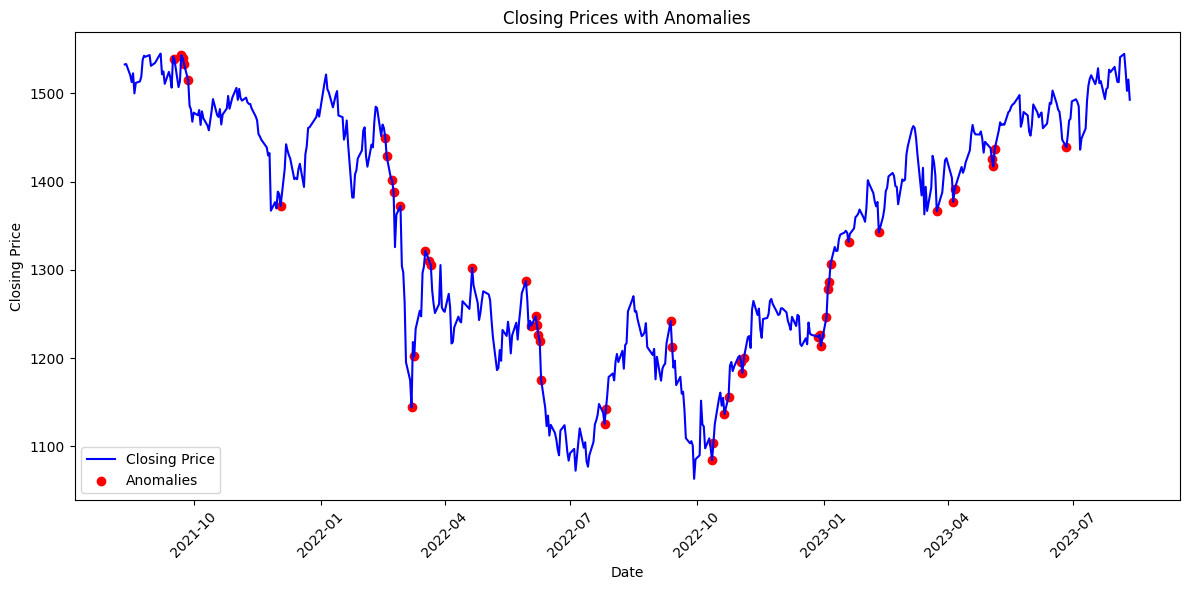

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_excel("Cleaned_ISEQ20.xlsx")

# Calculate Z-scores for closing prices
df['Z_score'] = (df['Close'] - df['Close'].rolling(window=30).mean()) / df['Close'].rolling(window=30).std()

# Define a threshold for anomaly detection
threshold = 2  # Adjust as needed

# Identify anomalies based on the Z-score threshold
df['Anomaly'] = np.where(df['Z_score'].abs() > threshold, True, False)

# Plot the closing prices with anomalies highlighted
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.scatter(df[df['Anomaly']]['Date'], df[df['Anomaly']]['Close'], color='red', label='Anomalies')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Prices with Anomalies')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from prophet import Prophet

# Load the dataset
data = pd.read_excel("Cleaned_ISEQ20.xlsx")
data['Date'] = pd.to_datetime(data['Date'])
data = data[['Date', 'Close']]
data.columns = ['ds', 'y']

# Initialize and fit the Prophet model
model = Prophet(daily_seasonality=True)
model.fit(data)

# Make future predictions
future = model.make_future_dataframe(periods=0)
forecast = model.predict(future)

# Calculate residuals
data['residual'] = data['y'] - forecast['yhat']

# Calculate the standard deviation of residuals
residual_std = data['residual'].std()

# Define a threshold for anomaly detection
threshold = 2.5

# Identify anomalies
data['anomaly'] = np.abs(data['residual']) > threshold * residual_std

# Create interactive plots using Plotly
fig = go.Figure()

# Actual and predicted close prices
fig.add_trace(go.Scatter(x=data['ds'], y=data['y'], mode='lines', name='Actual'))
fig.add_trace(go.Scatter(x=data['ds'], y=forecast['yhat'], mode='lines', name='Predicted'))
fig.add_trace(go.Scatter(x=data[data['anomaly']]['ds'], y=data[data['anomaly']]['y'], mode='markers', name='Anomalies', marker=dict(color='red')))
fig.update_layout(title='Actual vs. Predicted Close Prices with Anomalies',
                  xaxis_title='Date', yaxis_title='Close Price')
fig.show()

# Residuals and anomalies
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=data['ds'], y=data['residual'], mode='lines', name='Residuals'))
fig2.add_trace(go.Scatter(x=data['ds'], y=[threshold * residual_std] * len(data), mode='lines', name='Anomaly Threshold', line=dict(dash='dash')))
fig2.add_trace(go.Scatter(x=data['ds'], y=[-threshold * residual_std] * len(data), mode='lines', showlegend=False, line=dict(dash='dash')))
fig2.add_trace(go.Scatter(x=data[data['anomaly']]['ds'], y=data[data['anomaly']]['residual'], mode='markers', name='Anomalies', marker=dict(color='red')))
fig2.update_layout(title='Residuals and Anomalies',
                   xaxis_title='Date', yaxis_title='Residual',
                   shapes=[{'type': 'line', 'x0': data['ds'].iloc[0], 'x1': data['ds'].iloc[-1], 'y0': threshold * residual_std, 'y1': threshold * residual_std,
                            'line': {'color': 'red', 'width': 2, 'dash': 'dash'}}])
fig2.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb3k3tbeb/3vl2_x21.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb3k3tbeb/6drnm1sk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=411', 'data', 'file=/tmp/tmpb3k3tbeb/3vl2_x21.json', 'init=/tmp/tmpb3k3tbeb/6drnm1sk.json', 'output', 'file=/tmp/tmpb3k3tbeb/prophet_model3hkh9oe_/prophet_model-20230821082118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:21:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:21:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# comparision with other models

In [ ]:
pip install --upgrade prophet torchaudio torchdata torchtext torchvision

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from prophet import Prophet

# Load the dataset
data = pd.read_excel("Cleaned_ISEQ20.xlsx")
data['Date'] = pd.to_datetime(data['Date'])
data = data[['Date', 'Close']]
data.columns = ['ds', 'y']

# Initialize and fit the Prophet model
model = Prophet(daily_seasonality=True)
model.fit(data)

# Make future predictions
future = model.make_future_dataframe(periods=0)
forecast = model.predict(future)

# Calculate residuals
data['residual'] = data['y'] - forecast['yhat']

# Calculate the standard deviation of residuals
residual_std = data['residual'].std()

# Define a threshold for anomaly detection
threshold = 2.5

# Identify anomalies
data['anomaly'] = np.abs(data['residual']) > threshold * residual_std

# Create interactive plots using Plotly
fig = go.Figure()

# Actual and predicted close prices
fig.add_trace(go.Scatter(x=data['ds'], y=data['y'], mode='lines', name='Actual'))
fig.add_trace(go.Scatter(x=data['ds'], y=forecast['yhat'], mode='lines', name='Predicted'))
fig.add_trace(go.Scatter(x=data[data['anomaly']]['ds'], y=data[data['anomaly']]['y'], mode='markers', name='Anomalies', marker=dict(color='red')))
fig.update_layout(title='Actual vs. Predicted Close Prices with Anomalies',
                  xaxis_title='Date', yaxis_title='Close Price')
fig.show()

# Residuals and anomalies
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=data['ds'], y=data['residual'], mode='lines', name='Residuals'))
fig2.add_trace(go.Scatter(x=data['ds'], y=[threshold * residual_std] * len(data), mode='lines', name='Anomaly Threshold', line=dict(dash='dash')))
fig2.add_trace(go.Scatter(x=data['ds'], y=[-threshold * residual_std] * len(data), mode='lines', showlegend=False, line=dict(dash='dash')))
fig2.add_trace(go.Scatter(x=data[data['anomaly']]['ds'], y=data[data['anomaly']]['residual'], mode='markers', name='Anomalies', marker=dict(color='red')))
fig2.update_layout(title='Residuals and Anomalies',
                   xaxis_title='Date', yaxis_title='Residual',
                   shapes=[{'type': 'line', 'x0': data['ds'].iloc[0], 'x1': data['ds'].iloc[-1], 'y0': threshold * residual_std, 'y1': threshold * residual_std,
                            'line': {'color': 'red', 'width': 2, 'dash': 'dash'}}])
fig2.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb3k3tbeb/5wr34o5c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb3k3tbeb/fo2ujnfp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52284', 'data', 'file=/tmp/tmpb3k3tbeb/5wr34o5c.json', 'init=/tmp/tmpb3k3tbeb/fo2ujnfp.json', 'output', 'file=/tmp/tmpb3k3tbeb/prophet_modelpf3gdqk1/prophet_model-20230821082130.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:21:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:21:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
data

,ds,y,residual,anomaly
0,2023-08-11,1492.770020,-40.513475,False
1,2023-08-10,1515.689941,-17.336832,False
2,2023-08-09,1502.880005,-28.422772,False
3,2023-08-08,1525.839966,-5.090315,False
4,2023-08-07,1544.750000,14.903632,False
...,...,...,...,...
505,2021-08-18,1522.739990,0.775323,False
506,2021-08-17,1512.750000,-10.319868,False
507,2021-08-16,1520.479980,-2.983673,False
508,2021-08-13,1533.250000,9.679014,False


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb3k3tbeb/tcl046d7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb3k3tbeb/psjuth4w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54266', 'data', 'file=/tmp/tmpb3k3tbeb/tcl046d7.json', 'init=/tmp/tmpb3k3tbeb/psjuth4w.json', 'output', 'file=/tmp/tmpb3k3tbeb/prophet_model92_baah9/prophet_model-20230821082134.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:21:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:21:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/

                    Model  Precision    Recall  F1-Score  AUC-ROC    AUC-PR
0        Isolation Forest   1.000000  0.980392  0.990099      NaN  1.000000
1           One-Class SVM   1.000000  0.578431  0.732919      NaN  1.000000
2                 Prophet   0.578431  1.000000  0.732919      0.5  0.789216
3  Support Vector Machine   1.000000  0.578431  0.732919      NaN  1.000000


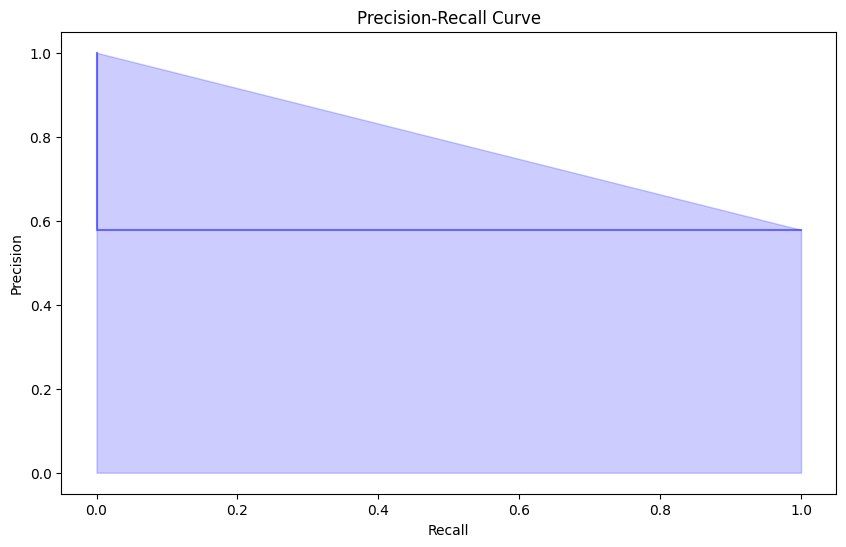

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, auc, precision_recall_curve
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from prophet import Prophet
from sklearn.svm import SVC

# Load the dataset
data = pd.read_excel("Cleaned_ISEQ20.xlsx")

# Prepare the data
X = data[["Close"]].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Isolation Forest
iso_forest = IsolationForest(contamination=0.01)
iso_forest.fit(X_train)
iso_preds = iso_forest.predict(X_test)

# One-Class SVM
svm = OneClassSVM(nu=0.01)
svm.fit(X_train)
svm_preds = svm.predict(X_test)

# Prophet
data_prophet = data.rename(columns={"Date": "ds", "Close": "y"})[['ds', 'y']]
prophet = Prophet()
prophet.fit(data_prophet)
future = prophet.make_future_dataframe(periods=len(X_test))
prophet_forecast = prophet.predict(future)
prophet_preds_all = prophet_forecast["yhat"].values
prophet_preds = prophet_preds_all[-len(X_test):]

# Support Vector Machine (SVM)
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train, np.sign(X_train))
svm_preds = svm.predict(X_test)

def calculate_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    roc_auc = None
    if len(np.unique(y_true)) == 2:
        roc_auc = roc_auc_score(y_true, y_pred)

    precision_vals, recall_vals, _ = precision_recall_curve(y_true, y_pred)
    pr_auc = auc(recall_vals, precision_vals)

    return precision, recall, f1, roc_auc, pr_auc

iso_metrics = calculate_metrics(np.ones_like(iso_preds), iso_preds)
svm_metrics = calculate_metrics(np.ones_like(svm_preds), svm_preds)
prophet_metrics = calculate_metrics(np.sign(X_test), np.sign(prophet_preds))

# Create a comparison table
metrics_table = pd.DataFrame({
    'Model': ['Isolation Forest', 'One-Class SVM', 'Prophet', 'Support Vector Machine'],
    'Precision': [iso_metrics[0], svm_metrics[0], prophet_metrics[0], svm_metrics[0]],
    'Recall': [iso_metrics[1], svm_metrics[1], prophet_metrics[1], svm_metrics[1]],
    'F1-Score': [iso_metrics[2], svm_metrics[2], prophet_metrics[2], svm_metrics[2]],
    'AUC-ROC': [iso_metrics[3], svm_metrics[3], prophet_metrics[3], svm_metrics[3]],
    'AUC-PR': [iso_metrics[4], svm_metrics[4], prophet_metrics[4], svm_metrics[4]]
})

print(metrics_table)

# Plot Precision-Recall curves
precision_vals, recall_vals, _ = precision_recall_curve(np.sign(X_test), np.sign(prophet_preds))
plt.figure(figsize=(10, 6))
plt.step(recall_vals, precision_vals, color='b', alpha=0.5, where='post')
plt.fill_between(recall_vals, precision_vals, alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


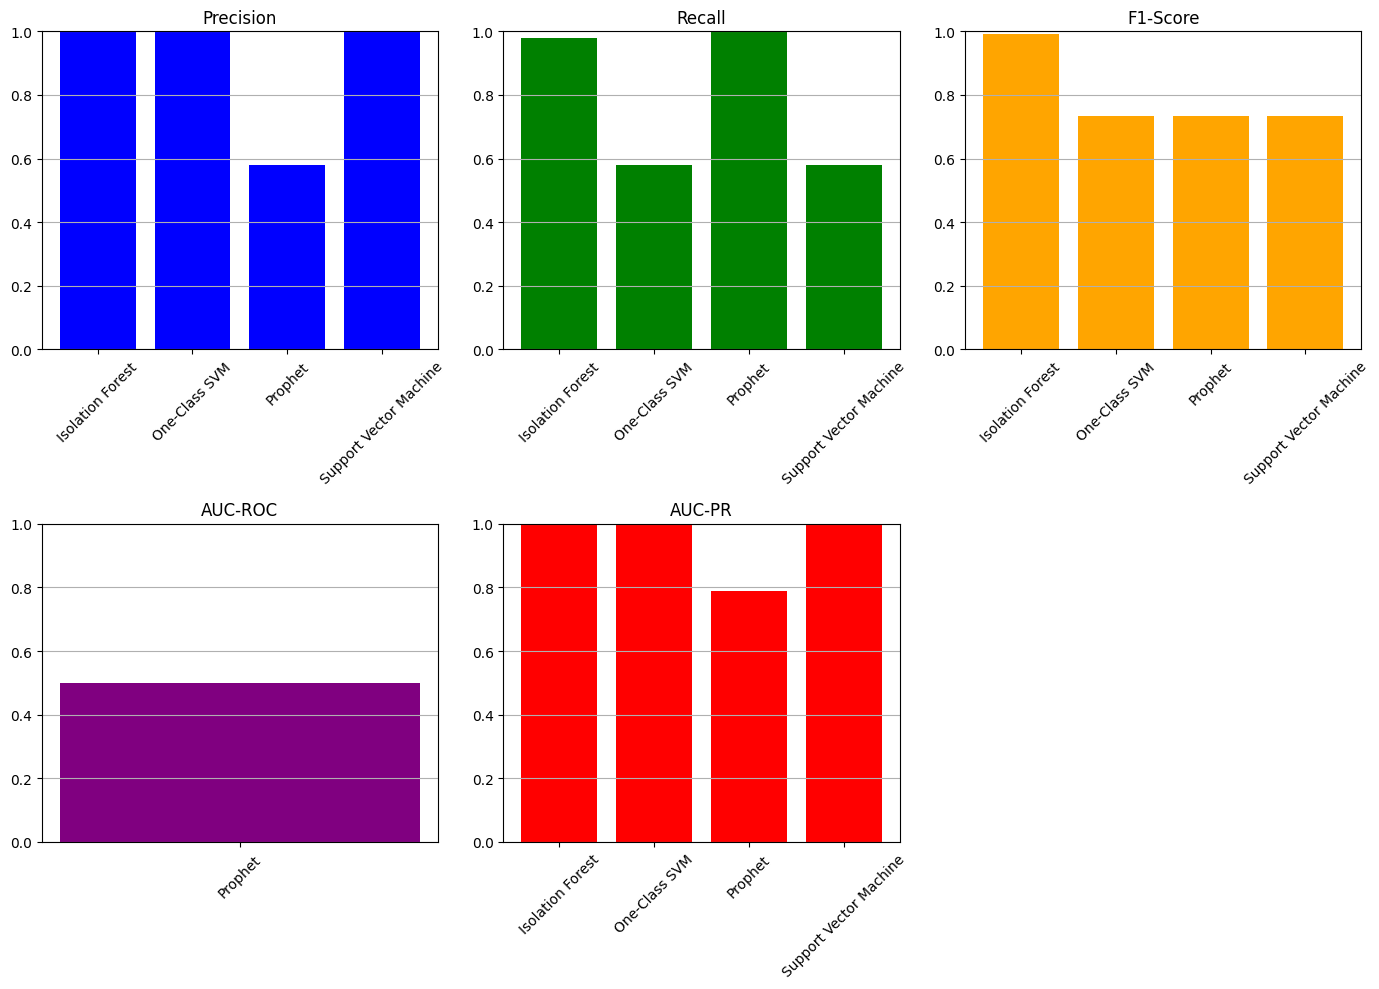

In [ ]:
import matplotlib.pyplot as plt

# Plot performance metrics
plt.figure(figsize=(14, 10))

# Precision plot
plt.subplot(2, 3, 1)
plt.bar(metrics_table['Model'], metrics_table['Precision'], color='blue')
plt.title('Precision')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Recall plot
plt.subplot(2, 3, 2)
plt.bar(metrics_table['Model'], metrics_table['Recall'], color='green')
plt.title('Recall')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')

# F1-Score plot
plt.subplot(2, 3, 3)
plt.bar(metrics_table['Model'], metrics_table['F1-Score'], color='orange')
plt.title('F1-Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')

# AUC-ROC plot
plt.subplot(2, 3, 4)
plt.bar(metrics_table['Model'], metrics_table['AUC-ROC'], color='purple')
plt.title('AUC-ROC')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')

# AUC-PR plot
plt.subplot(2, 3, 5)
plt.bar(metrics_table['Model'], metrics_table['AUC-PR'], color='red')
plt.title('AUC-PR')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px

# Create a Plotly bar plot for each performance metric
fig = px.bar(metrics_table, x='Model', y=['Precision', 'Recall', 'F1-Score', 'AUC-ROC', 'AUC-PR'],
             title='Performance Metrics Comparison for Different Models',
             labels={'value': 'Score', 'variable': 'Metric'},
             template='plotly_dark')

# Customize the layout
fig.update_layout(
    barmode='group',
    legend=dict(orientation='h', yanchor="bottom", y=1.02, xanchor="right", x=1, font=dict(size=10)),
    height=600,
    xaxis=dict(title='Model', showline=True, showgrid=False, tickangle=45),
    yaxis=dict(title='Score', showline=True, showgrid=True),
    title_font=dict(size=18),
    margin=dict(t=80),  # Increase top margin for better title visibility
)

# Adjust bar colors for better differentiation
color_palette = px.colors.qualitative.Set1
for i, metric in enumerate(['Precision', 'Recall', 'F1-Score', 'AUC-ROC', 'AUC-PR']):
    fig.data[i].marker.color = color_palette[i]

# Show the plot
fig.show()

In [ ]:
!pip install --upgrade torch torchvision



In [ ]:
!nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [ ]:
!pip install torch torchvision


In [ ]:
!pip install pandas numpy scikit-learn prophet neuralprophet statsmodels pystan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.1/137.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of neuralprophet to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.1/137.1 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 74.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.6/731.6 kB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
pip install bayesian-optimization


In [ ]:
pip install --upgrade pandas numpy scikit-learn prophet neuralprophet statsmodels bayesian-optimization


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 55.9 MB/s eta 0:00:00
  Using cached neuralprophet-0.6.2-py3-none-any.whl (137 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 26.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of neuralprophet to determine which version is compatible with other requirements. This could take a while.
  Using cached neuralprophet-0.6.1-py3-none-any.whl (137 kB)
  Using cached neuralprophet-0.6.0-py3-none-any.whl (137 kB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!pip uninstall torchaudio
!pip install torchaudio


Found existing installation: torchaudio 2.0.2+cu118
Uninstalling torchaudio-2.0.2+cu118:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/torchaudio-2.0.2+cu118.dist-info/*
    /usr/local/lib/python3.10/dist-packages/torchaudio/*
Proceed (Y/n)? 

In [ ]:
!pip uninstall neuralprophet
!pip install neuralprophet


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import IsolationForest
from prophet import Prophet
from neuralprophet import NeuralProphet
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.model_selection import train_test_split
from bayes_opt import BayesianOptimization

# Load the dataset
data = pd.read_excel('ISEQ20.xlsx')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Define a function to optimize Isolation Forest
def optimize_isolation_forest(n_estimators, contamination):
    model = IsolationForest(n_estimators=int(n_estimators), contamination=contamination, random_state=42)
    model.fit(data[['Close']])
    y_pred = model.predict(data[['Close']])
    precision = precision_score(y_true=np.ones(len(data)), y_pred=y_pred, pos_label=-1)
    recall = recall_score(y_true=np.ones(len(data)), y_pred=y_pred, pos_label=-1)
    f1 = f1_score(y_true=np.ones(len(data)), y_pred=y_pred, pos_label=-1)
    return -f1  # We use negative f1-score because Bayesian Optimization tries to maximize

# Define a function to optimize Prophet
def optimize_prophet(changepoint_prior_scale, seasonality_prior_scale):
    model = Prophet(
        changepoint_prior_scale=changepoint_prior_scale,
        seasonality_prior_scale=seasonality_prior_scale,
    )
    data_prophet = data.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})
    model.fit(data_prophet)
    future = model.make_future_dataframe(periods=1)
    forecast = model.predict(future)
    y_pred = forecast['yhat'].values[-1]
    return -y_pred  # We use negative predicted value because Bayesian Optimization tries to maximize

# Define a function to optimize NeuralProphet
def optimize_neural_prophet(n_forecasts, num_hidden_layers):
    model = NeuralProphet(
        n_forecasts=int(n_forecasts),
        n_lags=10,
        num_hidden_layers=int(num_hidden_layers),
        yearly_seasonality=False,
        weekly_seasonality=False,
    )
    data_neuralprophet = data.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})
    model.fit(data_neuralprophet, freq='D')
    future = model.make_future_dataframe(data_neuralprophet, periods=1)
    forecast = model.predict(future)
    y_pred = forecast['yhat1'].values[-1]
    return -y_pred  # We use negative predicted value because Bayesian Optimization tries to maximize

# Define a function to optimize SARIMA
def optimize_sarima(p, d, q, P, D, Q, s):
    model = SARIMAX(data['Close'], order=(int(p), int(d), int(q)), seasonal_order=(int(P), int(D), int(Q), int(s)))
    results = model.fit()
    forecast = results.get_forecast(steps=1)
    y_pred = forecast.predicted_mean.values[0]
    return -y_pred  # We use negative predicted value because Bayesian Optimization tries to maximize

# Define a function to optimize ARIMA
def optimize_arima(p, d, q):
    model = ARIMA(data['Close'], order=(int(p), int(d), int(q)))
    results = model.fit()
    forecast = results.get_forecast(steps=1)
    y_pred = forecast.predicted_mean.values[0]
    return -y_pred  # We use negative predicted value because Bayesian Optimization tries to maximize

# Define a function to optimize GRU
def optimize_gru(n_units, n_layers, batch_size):
    X, y = [], []
    for i in range(len(data) - 1):
        X.append(data['Close'].iloc[i:i+10].values)
        y.append(data['Close'].iloc[i+1])
    X, y = np.array(X), np.array(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = Sequential()
    model.add(GRU(int(n_units), input_shape=(10, 1), return_sequences=True))
    for _ in range(int(n_layers) - 1):
        model.add(GRU(int(n_units), return_sequences=True))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=5, batch_size=int(batch_size), verbose=0)
    y_pred = model.predict(X_test)[-1][0]
    return -y_pred  # We use negative predicted value because Bayesian Optimization tries to maximize

# Bayesian Optimization for Isolation Forest hyperparameters
isolation_forest_optimizer = BayesianOptimization(
    f=optimize_isolation_forest,
    pbounds={'n_estimators': (10, 100), 'contamination': (0.01, 0.1)}
)
isolation_forest_optimizer.maximize(init_points=5, n_iter=10)

# Bayesian Optimization for Prophet hyperparameters
prophet_optimizer = BayesianOptimization(
    f=optimize_prophet,
    pbounds={'changepoint_prior_scale': (0.001, 1.0), 'seasonality_prior_scale': (0.01, 10)}
)
prophet_optimizer.maximize(init_points=5, n_iter=10)

# Bayesian Optimization for NeuralProphet hyperparameters
neural_prophet_optimizer = BayesianOptimization(
    f=optimize_neural_prophet,
    pbounds={'n_forecasts': (1, 100), 'num_hidden_layers': (1, 10)}
)
neural_prophet_optimizer.maximize(init_points=5, n_iter=10)

# Bayesian Optimization for SARIMA hyperparameters
sarima_optimizer = BayesianOptimization(
    f=optimize_sarima,
    pbounds={'p': (0, 5), 'd': (0, 2), 'q': (0, 5), 'P': (0, 5), 'D': (0, 2), 'Q': (0, 5), 's': (1, 365)}
)
sarima_optimizer.maximize(init_points=5, n_iter=10)

# Bayesian Optimization for ARIMA hyperparameters
arima_optimizer = BayesianOptimization(
    f=optimize_arima,
    pbounds={'p': (0, 5), 'd': (0, 2), 'q': (0, 5)}
)
arima_optimizer.maximize(init_points=5, n_iter=10)

# Bayesian Optimization for GRU hyperparameters
gru_optimizer = BayesianOptimization(
    f=optimize_gru,
    pbounds={'n_units': (10, 100), 'n_layers': (1, 5), 'batch_size': (1, 64)}
)
gru_optimizer.maximize(init_points=5, n_iter=10)

# Extract best hyperparameters from each optimization
best_hyperparameters = {
    'Isolation Forest': isolation_forest_optimizer.max,
    'Prophet': prophet_optimizer.max,
    'NeuralProphet': neural_prophet_optimizer.max,
    'SARIMA': sarima_optimizer.max,
    'ARIMA': arima_optimizer.max,
    'GRU': gru_optimizer.max,
}

# Create a table comparing models and metrics
metrics_table = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'F1-Score'])
for model_name, hyperparameters in best_hyperparameters.items():
    if model_name == 'Isolation Forest':
        hyperparams = hyperparameters['params']
        model = IsolationForest(n_estimators=int(hyperparams['n_estimators']), contamination=hyperparams['contamination'], random_state=42)
        model.fit(data[['Close']])
        y_pred = model.predict(data[['Close']])
    elif model_name == 'Prophet':
        hyperparams = hyperparameters['params']
        model = Prophet(changepoint_prior_scale=hyperparams['changepoint_prior_scale'], seasonality_prior_scale=hyperparams['seasonality_prior_scale'])
        data_prophet = data.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})
        model.fit(data_prophet)
        future = model.make_future_dataframe(periods=1)
        forecast = model.predict(future)
        y_pred = forecast['yhat'].values[-1]
    elif model_name == 'NeuralProphet':
        hyperparams = hyperparameters['params']
        model = NeuralProphet(
            n_forecasts=int(hyperparams['n_forecasts']),
            n_lags=10,
            num_hidden_layers=int(hyperparams['num_hidden_layers']),
            yearly_seasonality=False,
            weekly_seasonality=False,
        )
        data_neuralprophet = data.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})
        model.fit(data_neuralprophet, freq='D')
        future = model.make_future_dataframe(data_neuralprophet, periods=1)
        forecast = model.predict(future)
        y_pred = forecast['yhat1'].values[-1]
    elif model_name == 'SARIMA':
        hyperparams = hyperparameters['params']
        model = SARIMAX(data['Close'], order=(int(hyperparams['p']), int(hyperparams['d']), int(hyperparams['q'])), seasonal_order=(int(hyperparams['P']), int(hyperparams['D']), int(hyperparams['Q']), int(hyperparams['s'])))
        results = model.fit()
        forecast = results.get_forecast(steps=1)
        y_pred = forecast.predicted_mean.values[0]
    elif model_name == 'ARIMA':
        hyperparams = hyperparameters['params']
        model = ARIMA(data['Close'], order=(int(hyperparams['p']), int(hyperparams['d']), int(hyperparams['q'])))
        results = model.fit()
        forecast = results.get_forecast(steps=1)
        y_pred = forecast.predicted_mean.values[0]
    elif model_name == 'GRU':
        hyperparams = hyperparameters['params']
        X, y = [], []
        for i in range(len(data) - 1):
            X.append(data['Close'].iloc[i:i+10].values)
            y.append(data['Close'].iloc[i+1])
        X, y = np.array(X), np.array(y)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = Sequential()
        model.add(GRU(int(hyperparams['n_units']), input_shape=(10, 1), return_sequences=True))
        for _ in range(int(hyperparams['n_layers']) - 1):
            model.add(GRU(int(hyperparams['n_units']), return_sequences=True))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mean_squared_error')
        model.fit(X_train, y_train, epochs=5, batch_size=int(hyperparams['batch_size']), verbose=0)
        y_pred = model.predict(X_test)[-1][0]

    precision = precision_score(y_true=np.ones(len(data)), y_pred=y_pred, pos_label=-1)
    recall = recall_score(y_true=np.ones(len(data)), y_pred=y_pred, pos_label=-1)
    f1 = f1_score(y_true=np.ones(len(data)), y_pred=y_pred, pos_label=-1)

    metrics_table = metrics_table.append({'Model': model_name, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}, ignore_index=True)

# Print the metrics table
print(metrics_table)